# SI 618 Homework #4

## Taylor Swift songs

Last updated 2024-10-02

The dataset for this assignment is from https://www.kaggle.com/datasets/jarredpriester/taylor-swift-spotify-dataset/data.


This dataset consist of data from Spotify's API on all albums listed on Spotify for Taylor Swift. I set up the dataset to update monthly so that if any albums get added it will get added to the dataset too. At first it may look like there are song duplicates but I checked and all song IDs are unique.

The columns in this dataset are:

name - the name of the song

album - the name of the album

release_date - the day month and year the album was released

track number - the order the song appears on the album

id - the Spotify id for the song

uri - the Spotify uri for the song

acousticness - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

danceability - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

instrumentalness - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

liveness - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

loudness - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

speechiness - detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

tempo - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

valence - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

popularity - the popularity of the song from 0 to 100

duration_ms - The duration of the track in milliseconds.

We are going to refer to the tracks' properties of danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, and valence as "features" of the tracks.



Points will be allocated according to the following rubric:

- 90-100%: Question is correctly and completely answered.  Answer consists of well-written code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines and is 
accompanied by a written interpretation in a Markdown block.  Written interpretation does not contain spelling, grammar or stylistic errors (see [Strunk & White](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view?usp=sharing) for a detailed specifications).  Minor problems, such as formatting, incorrect submissions, missing names, etc. will result in less than 100%.
- 75-85% : Answer is mostly complete and correct; two or fewer noticeable omissions or errors.  Minor stylistic flaws, either in code or in
written interpretation.
- 50-70%: Answer has significant omissions or errors; Noticeable departure from PEP-8 guildelines and/or moderate spelling, grammar, or style issues
in written interpretations.
- 25-45%: Question is perfunctorily attempted.  Substantial parts are missing or incorrect.
- 0 points: Question not attempted.

Be sure to include interpretations of your results for each question.

Q1 (10pts):             
* (a) Show the distribution of the popularity of the songs.  Then exclude the songs that are marked as "Taylor's version".  Show the distribution of the popularity of the songs.  What is the difference between the two distributions?
* (b) Show the variation in song popularity over the years. Are there any notable trends or observations? Please explain.

Q2 (10pts):                     
* Report the average track duration for each album.     
* Your answer should be in mm:ss (minutes:seconds) format rather than the milliseconds that are reported in the original dataset. 

Q3 (15pts):     
* Generate correlation heatmaps to visualize the relationships between song features, utilizing a diverging color map with white representing a zero correlation.       
* Identify the top five strongest correlations among these features.    
* Provide an analysis of your findings, including explanations for why certain variables exhibit strong correlations and the potential rationale behind these relationships.



Q4 (10pts): 
- Analyze how the position of the track on the album (i.e., track number) influences the song's popularity, considering additional musical features. 
- Specifically, evaluate the correlation between track number and popularity, and then examine if certain musical features (e.g., danceability, energy, acousticness) mediate this relationship. 
- Use both visual and statistical evidence to support your findings. 
- Discuss how these features may interact with track position to affect a song's popularity

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv("taylor_swift_spotify.csv")
feature = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','duration_ms']

In [4]:
corr_pop_track = data[['popularity', 'track_number']].corr()
corr_pop_track

,popularity,track_number
popularity,1.000000,-0.227873
track_number,-0.227873,1.000000


In [5]:
corr_pop_feature = data[['track_number', 'popularity'] + feature].corr()
corr_pop_feature

,track_number,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_ms
track_number,1.000000,-0.227873,0.045006,-0.043236,-0.007756,-0.038075,-0.048385,-0.022873,-0.017879,0.048523,-0.018019,0.039205
popularity,-0.227873,1.000000,0.103761,0.013204,-0.111898,0.031498,-0.187878,-0.190907,-0.037221,-0.018183,-0.095194,-0.062182
acousticness,0.045006,0.103761,1.000000,-0.178000,-0.711983,0.143078,-0.137689,-0.725913,0.047488,-0.064001,-0.214348,-0.035478
danceability,-0.043236,0.013204,-0.178000,1.000000,0.034833,-0.070607,-0.139451,0.016570,0.167959,-0.229525,0.303885,-0.307932
energy,-0.007756,-0.111898,-0.711983,0.034833,1.000000,-0.081544,0.157008,0.794626,-0.070511,0.175123,0.487221,-0.039674
instrumentalness,-0.038075,0.031498,0.143078,-0.070607,-0.081544,1.000000,-0.042495,-0.194656,-0.026335,-0.005492,-0.069740,-0.023248
liveness,-0.048385,-0.187878,-0.137689,-0.139451,0.157008,-0.042495,1.000000,0.123641,0.083958,-0.019967,-0.061147,0.110901
loudness,-0.022873,-0.190907,-0.725913,0.016570,0.794626,-0.194656,0.123641,1.000000,-0.243075,0.117701,0.357034,0.094043
speechiness,-0.017879,-0.037221,0.047488,0.167959,-0.070511,-0.026335,0.083958,-0.243075,1.000000,0.049339,0.050848,-0.298075
tempo,0.048523,-0.018183,-0.064001,-0.229525,0.175123,-0.005492,-0.019967,0.117701,0.049339,1.000000,0.102885,-0.020806


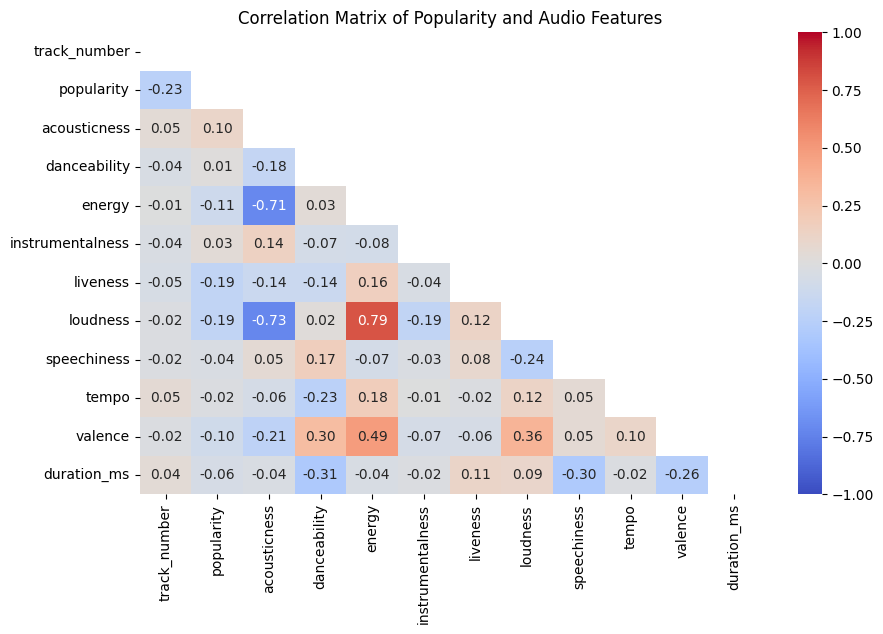

In [6]:
mask = np.triu(np.ones_like(corr_pop_feature, dtype=bool))
plt.figure(figsize=(10, 6))
sns.heatmap(corr_pop_feature, mask=mask, annot=True, cmap='coolwarm', vmax = 1, vmin = -1, fmt=".2f")
plt.title('Correlation Matrix of Popularity and Audio Features')
plt.show()

In [8]:
popularity_track_ols = smf.ols('popularity ~ track_number + acousticness + danceability + energy + instrumentalness + liveness + loudness  + speechiness + tempo + valence + duration_ms', data=data).fit()
print(popularity_track_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     9.055
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           5.36e-15
Time:                        12:24:47   Log-Likelihood:                -2397.6
No. Observations:                 582   AIC:                             4819.
Df Residuals:                     570   BIC:                             4872.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           49.8441      9.503  

In [9]:
popularity_track_only_ols = smf.ols('popularity ~ track_number', data=data).fit()
print(popularity_track_only_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     31.77
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           2.72e-08
Time:                        12:25:48   Log-Likelihood:                -2429.0
No. Observations:                 582   AIC:                             4862.
Df Residuals:                     580   BIC:                             4871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       63.0854      1.134     55.627   

In [10]:
track_feature_ols = smf.ols('popularity ~ acousticness + danceability + energy + instrumentalness + liveness + loudness  + speechiness + tempo + valence + duration_ms', data=data).fit()
print(track_feature_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     5.579
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        12:26:57   Log-Likelihood:                -2417.4
No. Observations:                 582   AIC:                             4857.
Df Residuals:                     571   BIC:                             4905.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           47.0025      9.811  

Q5 (15pts):
- Explore the characteristics that differentiate popular songs from less popular ones. 
- Divide the songs into popular (popularity rating of 60 or higher) and less popular (popularity rating of less than 60). 
- Conduct a comparative analysis of these two groups across multiple features: danceability, energy, acousticness, and tempo. 
- Use ANOVA tests to determine if differences in these features between popular and less popular songs are statistically significant. 
- Additionally, explore if there's a notable trend in the duration of songs (duration_ms) between the two groups. 

Q6 (20pts):
- Build a multiple linear regression model to predict the popularity of a song based on a set of acoustic features: 'liveness', 'danceability', 'energy', and 'acousticness'. Evaluate the model by reporting:

    - The coefficient of determination (i.e. $r^2$) for the entire model to understand how well these variables together predict song popularity.
    - The statistical significance of the regression model and each predictor variable within it.
    - Predictions for song popularity at two different levels of 'liveness': 0.22 and 0.50, while holding other variables at their mean values."

In [11]:
# Q6 Linear Regression Prediction on Popularity
## Building OLS
popularity_feature_ols = smf.ols('popularity ~ liveness + danceability + energy + acousticness', data=data).fit()
print(popularity_feature_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     6.488
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           4.12e-05
Time:                        12:31:55   Log-Likelihood:                -2431.7
No. Observations:                 582   AIC:                             4873.
Df Residuals:                     577   BIC:                             4895.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       63.4141      5.512     11.505   

**Interpretation of the Model**:
1. $F$-statistic is 6.488 with $p<0.05$, indicating that the model as a whole is statistically significant.
2. $r^2$ is 0.043, which means that 4.3% of the variance in song popularity can be explained by the model.
3. The $p$-value for 'liveness' is below 0.001. The variable is statistically significant at 99% confidence level. The rest of the variables are not statistically significant at the 95% confidence level.

In [15]:
## Prediction
## Predicting popularity at liveness=0.22 and liveness=0.50, holding other variables at their means
popularity_prediction = popularity_feature_ols.get_prediction(pd.DataFrame({'liveness': [0.22, 0.50],
                                                                            'danceability': [data['danceability'].mean(), data['danceability'].mean()],
                                                                            'energy': [data['energy'].mean(), data['energy'].mean()],
                                                                            'acousticness': [data['acousticness'].mean(), data['acousticness'].mean()]}))
popularity_prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,56.646583,0.718794,55.234812,58.058355,25.472559,87.820608
1,50.887661,1.799552,47.353190,54.422132,19.545690,82.229633


**Interpretation of the Predictions**:
Holding other features at their means, the model predicts that songs with a 'liveness' value of 0.22 will have a popularity of 56.6 (95% ci [55.2, 58.1]). Songs with a 'liveness' value of 0.50 will have a popularity of 50.9 (95% ci [47.4, 54.4]). 

Q7 (20pts):
- In addition to analyzing the popularity scores of original vs. re-recorded songs by Taylor Swift, evaluate the differences in their musical characteristics, including danceability, energy, acousticness, and duration_ms. Perform the following analyses:

    - a) Create visualizations that compare the distribution of popularity scores, as well as the mentioned acoustic features, between original and re-recorded songs.

    - b) Conduct statistical tests to determine if there are significant differences in popularity, danceability, energy, acousticness, and duration between the original and re-recorded songs. Report which versions are more favorable in terms of popularity and how the musical characteristics have changed in the re-recorded versions. 
- hint: The re-recorded ones have `(Taylor’s version)` at the end of the album name. 

In [49]:
# Q7 Analyzing the difference between original and re-recorded songs
## Create a label for original and re-recorded songs

data['original'] = np.where(data['album'].str.contains("Taylor's Version"), 'Re-Recorded', 'Original')
## Examine the descriptive statistics
data.groupby('original').describe()


Unnamed: 0                          ... duration_ms                    
                 count        mean         std  ...         50%       75%       max
original                                        ...                                
Original         461.0  331.861171  162.780895  ...    233626.0  257359.0  404680.0
Re-Recorded      121.0  132.917355   60.950743  ...    240466.0  267653.0  613026.0

[2 rows x 104 columns]

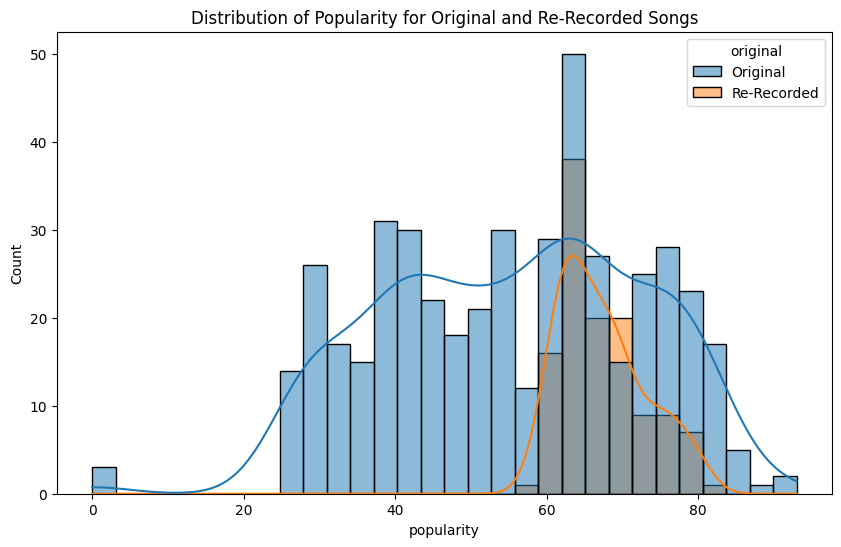

In [52]:
## Create histograms to show the distribution of popularity for original and re-recorded songs
plt.figure(figsize=(10, 6))
sns.histplot(data, x='popularity', hue='original', kde=True, bins=30)
plt.title('Distribution of Popularity for Original and Re-Recorded Songs')
plt.show()

The distribution of popularity between original and re-recorded songs are evidently different. Most of the re-recorded songs have a popularity score above 60. About half of the original songs have a popularity score below 60. There are also some original songs with little popularity. Though the two groups have most songs with around 65 popularity score, the original songs have a longer left tail.

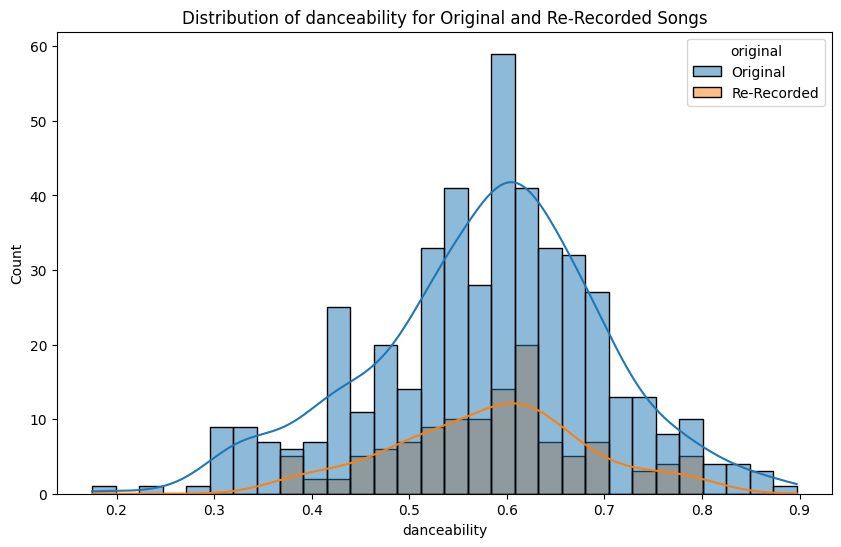

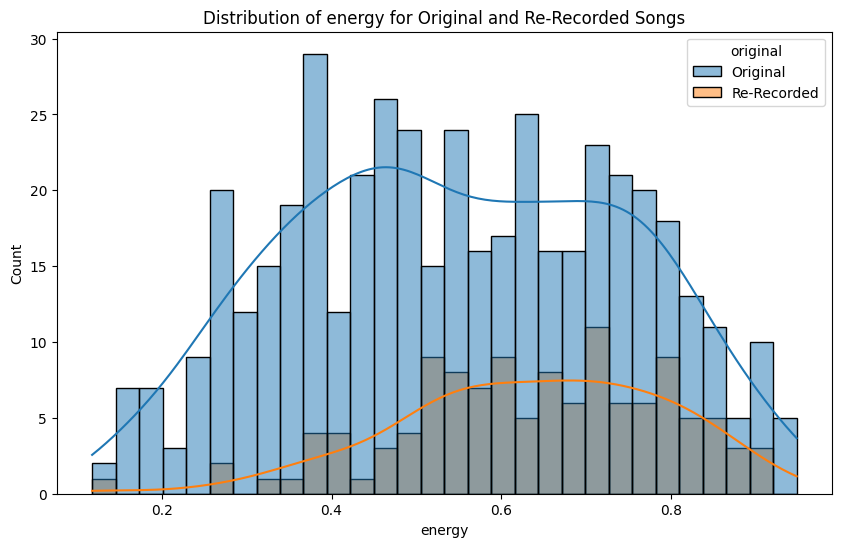

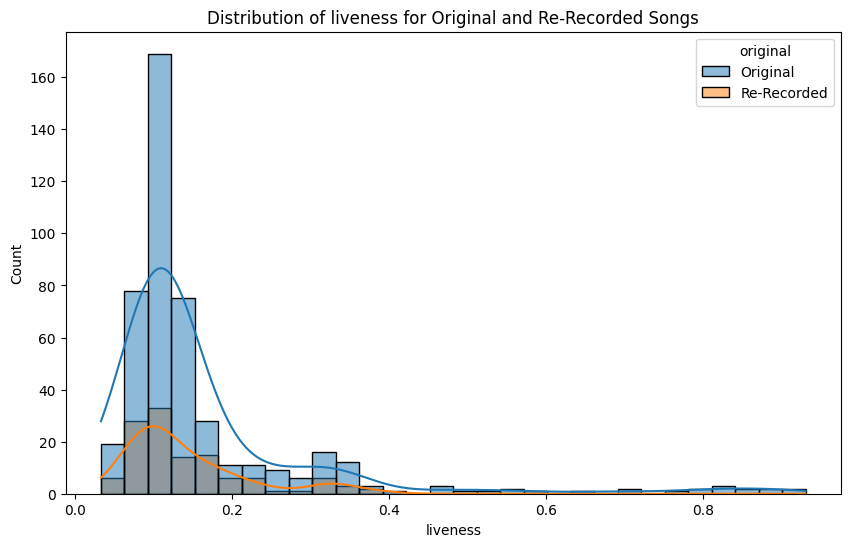

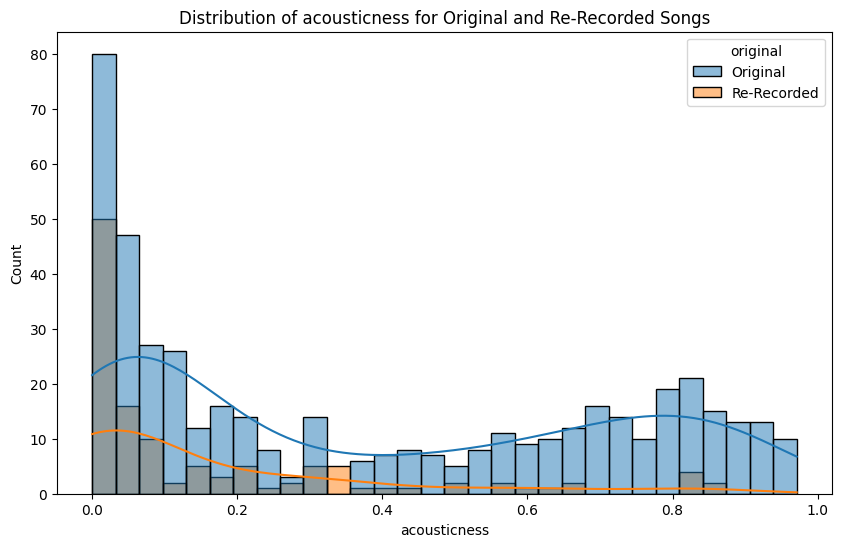

In [53]:
for feature in ['danceability', 'energy', 'liveness', 'acousticness']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data, x=feature, hue='original', kde=True, bins=30)
    plt.title(f'Distribution of {feature} for Original and Re-Recorded Songs')
    plt.show()

1. The distributions of danceability of originial and re-recorded songs are quite similar. Both are similar to normal distribution and are centered around 60.
2. The distribution of energy of original songs is more similar to binomial distribution while the distribution of energy of re-recorded songs is more similar to normal distribution. The distributions suggest that the mean of energy for re-recorded songs is higher than that of original songs.
3. The distributions of liveness of two groups are quite similar. They both centered around 0.15 and have a long right tail.
4. The distributions of acousticness of two groups are both right-skewed. The distribution of acousticness of original songs is more similar to binomial distribution that the that of re-recorded songs.

In [55]:
## Conduct difference of means tests to compare the characteristics of original and re-recorded songs
for feature in ['danceability', 'energy', 'liveness', 'acousticness', 'duration_ms']:
    diff = data.groupby('original')[feature].mean().diff().iloc[-1]
    t_stat, p_value, df = sm.stats.ttest_ind(data[data['original'] == 'Original'][feature], data[data['original'] == 'Re-Recorded'][feature])
    print(f'T-test for {feature}:')
    print(f'Difference of means (Re-Recorded - Original): {diff:.2f}')
    print(f't-statistic: {t_stat:.2f}')
    print(f'p-value: {p_value:.4f}')
    print(f'Degree of Freedom {df}\n')

T-test for danceability:
Difference of means: 0.01
t-statistic: -0.49
p-value: 0.6276
Degree of Freedom 580.0

T-test for energy:
Difference of means: 0.09
t-statistic: -4.73
p-value: 0.0000
Degree of Freedom 580.0

T-test for liveness:
Difference of means: -0.02
t-statistic: 1.74
p-value: 0.0824
Degree of Freedom 580.0

T-test for acousticness:
Difference of means: -0.22
t-statistic: 6.76
p-value: 0.0000
Degree of Freedom 580.0

T-test for duration_ms:
Difference of means: 10761.74
t-statistic: -2.30
p-value: 0.0217
Degree of Freedom 580.0



**Interpretation of t-test results**:
1. The danceability of re-recorded songs are 0.01 higher than original songs on average. The difference of the means of danceability between two groups is not statistically significant.
2. Energy of re-recorded songs are 0.09 higher than that of original songs on average. The difference of the means of energy between two groups is statistically significant at 95% confidence level.
3. Liveness of re-recorded songs are 0.02 lower than that of original songs on average. The difference of the means of liveness between two groups is not statistically significant at 95% confidence level.
4. Acousticness of re-recorded songs are 0.22 lower than that of original songs on average. The difference of the means of acousticness between two groups is statistically significant at 95% confidence level.
5. The re-recorded songs are 10.8 seconds longer than the original songs on average. The difference of the means of duration between two groups is statistically significant at 95% confidence level.

BONUS, worth up to 2 points: How would you determine whether [Taylor Swift has had an effect on the presidential election of 2024](https://www.nytimes.com/2024/09/19/us/elections/taylor-swift-trump-harris-poll.html)?  What data would you need?  What analysis would you perform?  What would you expect the results to be?

**Settings**:
To evaluate Taylor Swift's influence on presidential election, ideally we should evaluate the poll results before and after Taylor Swift's endorsement of Kamala Harris. But this is not reasonable in a real world as we cannot hold two presidential elections in such a short period. 

Instead, we can use public survey about attitude towards two president candidates to be an instrument for the poll results. Because we can assume that voter will vote for the candidate they prefer. By design, we can recruit a large group of people and ask them about their preference toward two candidates before and after Taylor Swift's endorsement. We can then compare the change of preference between two groups of people with the difference-in-differences approach.

**Data**:
We need to recruit a large sample of voters. We need to ensure that the sample is representative of the whole voter population. We then randomly divide the sample to two groups of equal sizes. One group will view Taylor's endorsement and the other group will view other things that are not relevant to Taylor. Given that the attitudes toward Taylor is possibly correlated with party identification/ party preference. We need to compare the sample mean of the demographics data (age, gender, etc.), party identification, and their attitude towards Taylor to ensure that there is no endogeneity issues in our sample. Then, we collect their survey responses about their preference toward two candidates before and after viewing Taylor Swift's endorsement.

**Analysis**:
We can use the difference-in-differences approach to evaluate the effect of Taylor Swift's endorsement on the presidential election to avoid the influence of time trends and systematic difference between Taylor fans and not fans. We can compare the change of preference toward two candidates between the group of people who have seen Taylor Swift's endorsement and the group of people who have not seen Taylor Swift's endorsement. We can then run a t-test or a regression to evaluate the statistical significance of the difference.

**Identification**:
$$
y = \beta_0 + \beta_1 \text{Treatment} + \beta_2 \text{After} + \beta_3 \text{Treatment} \times \text{After} + \epsilon
$$
Given $y$ as the likelihood to vote for Kamala Harris, $\text{Treatment}$ as the indicator for whether the person has seen Taylor Swift's endorsement, and $\text{After}$ as the indicator for whether the survey is conducted after the endorsement. $\beta_3$ is our coefficient of interest. If $\beta_3$ is positive and statistically significant, we can conclude that Taylor Swift's endorsement has a positive effect on the likelihood to vote for Kamala Harris. If $\beta_3$ is not statistically significant, we roughly conclude that Taylor Swift's endorsement has no effect on the likelihood to vote for Kamala Harris.

### Submit your completed assignment in both IPYNB and HTML formats.